In [40]:
import pandas as pd
import statsmodels.api as sm
import math
import json
import itertools
from scipy import stats
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

In [41]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/Carlosjunior/Documents/CHL/Insper fisico/2 semestre/Ciencia dos Dados/Projeto_3


In [42]:
mortalidade = pd.read_csv("dados_mort")


In [43]:
mortalidade.head()

,Unnamed: 0,PAIS,MORTALIDADE_INFANTIL,HEALTH_SPEND,ELECTRICITY
0,3,Albania,17.9,220.964114,1510.482138
1,4,Algeria,29.5,238.136941,920.914005
2,7,Angola,192.0,160.930350,204.210437
3,10,Argentina,15.4,761.762852,2801.082960
4,11,Armenia,20.0,102.296386,1630.233270


In [44]:
log_saude=[]
log_eletricidade=[]
saude=[]
eletricidade=[]
pais=[]
mortalidad=[]

for i in range(len(mortalidade)):
    log_saude.append(math.log10(mortalidade.HEALTH_SPEND[i]))
    log_eletricidade.append(math.log10(mortalidade.ELECTRICITY[i]))
    

MORTALIDADE_INFANTIL = list(mortalidade.MORTALIDADE_INFANTIL)
ELETRICIDADE = list(mortalidade.ELECTRICITY)
PAIS = list(mortalidade.PAIS)
SAUDE = list(mortalidade.ELECTRICITY)

for i in range(len(mortalidade)):
    mortalidad.append(MORTALIDADE_INFANTIL[i])
    pais.append(PAIS[i])
    saude.append(SAUDE[i])
    eletricidade.append(ELETRICIDADE[i])

mortalidade0 = pd.DataFrame({"Eletricidade":eletricidade,"Saude":saude,"Mortalidade_Infantil":mortalidad,"Log_Eletricidade":log_eletricidade,"Log_Saúde":log_saude,"País":pais})

In [45]:
mortalidade0.head()

,Eletricidade,Log_Eletricidade,Log_Saúde,Mortalidade_Infantil,País,Saude
0,1510.482138,3.179116,2.344322,17.9,Albania,1510.482138
1,920.914005,2.964219,2.376827,29.5,Algeria,920.914005
2,204.210437,2.310078,2.206638,192.0,Angola,204.210437
3,2801.082960,3.447326,2.881820,15.4,Argentina,2801.082960
4,1630.233270,3.212250,2.009860,20.0,Armenia,1630.233270


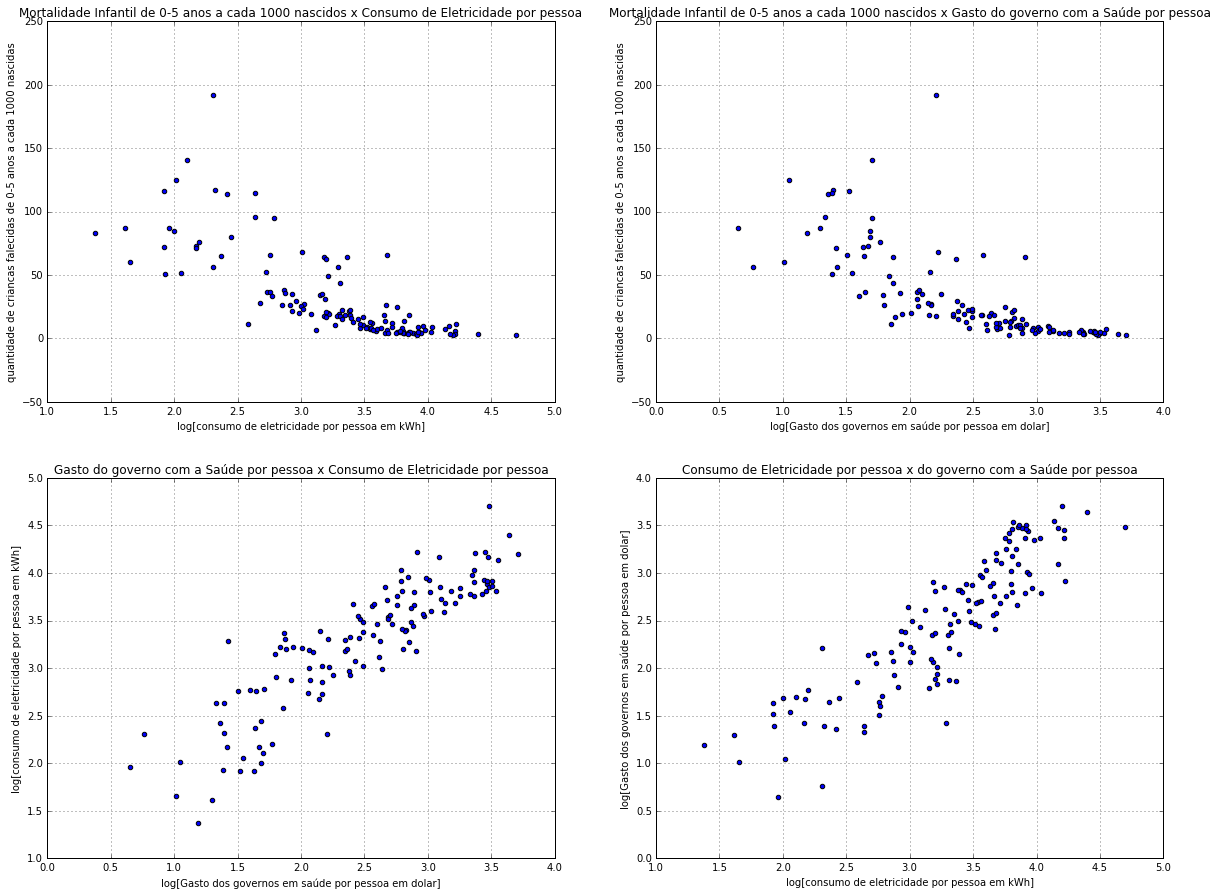

In [46]:
f, ax = plt.subplots(2,2, figsize = (20,15))
ax[0, 0].scatter(mortalidade0.Log_Eletricidade, mortalidade0.Mortalidade_Infantil)
ax[0, 0].set_title('Mortalidade Infantil de 0-5 anos a cada 1000 nascidos x Consumo de Eletricidade por pessoa')
ax[0, 0].set_xlabel('log[consumo de eletricidade por pessoa em kWh]')
ax[0, 0].set_ylabel('quantidade de criancas falecidas de 0-5 anos a cada 1000 nascidas')
ax[0,0].grid(True)

ax[0, 1].scatter(mortalidade0.Log_Saúde, mortalidade0.Mortalidade_Infantil)
ax[0, 1].set_title('Mortalidade Infantil de 0-5 anos a cada 1000 nascidos x Gasto do governo com a Saúde por pessoa')
ax[0, 1].set_xlabel('log[Gasto dos governos em saúde por pessoa em dolar]')
ax[0, 1].set_ylabel('quantidade de criancas falecidas de 0-5 anos a cada 1000 nascidas')
ax[0,1].grid(True)

ax[1, 0].scatter(mortalidade0.Log_Saúde, mortalidade0.Log_Eletricidade)
ax[1, 0].set_title('Gasto do governo com a Saúde por pessoa x Consumo de Eletricidade por pessoa')
ax[1, 0].set_xlabel('log[Gasto dos governos em saúde por pessoa em dolar]')
ax[1, 0].set_ylabel('log[consumo de eletricidade por pessoa em kWh]')
ax[1,0].grid(True)

ax[1, 1].scatter(mortalidade0.Log_Eletricidade,mortalidade0.Log_Saúde)
ax[1, 1].set_title('Consumo de Eletricidade por pessoa x do governo com a Saúde por pessoa')
ax[1, 1].set_xlabel('log[consumo de eletricidade por pessoa em kWh]')
ax[1, 1].set_ylabel('log[Gasto dos governos em saúde por pessoa em dolar]')
ax[1,1].grid(True)

## Análise descritiva:

* Quanto maior for o consumo de eletricidade por pessoa a mortalidade infantil do ano de 2007 tende a diminuir .
* Quanto maior for o gasto do governo com saúde por pessoa a mortalidade infantil tende a diminuir.


In [47]:
mortalidade0.corr(method='pearson')

,Eletricidade,Log_Eletricidade,Log_Saúde,Mortalidade_Infantil,Saude
Eletricidade,1.000000,0.690274,0.620323,-0.432447,1.000000
Log_Eletricidade,0.690274,1.000000,0.885401,-0.775486,0.690274
Log_Saúde,0.620323,0.885401,1.000000,-0.738543,0.620323
Mortalidade_Infantil,-0.432447,-0.775486,-0.738543,1.000000,-0.432447
Saude,1.000000,0.690274,0.620323,-0.432447,1.000000


## Problema
** A falta de eletricidade e baixo investimento do governo em saúde leva ao aumento da mortalidade infantil?**


In [48]:
y=mortalidade0.Mortalidade_Infantil
X=mortalidade0.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

mortalidade_linha=sm1.OLS(y, X)
mortalidade_linha=mortalidade_linha.fit()
mortalidade_linha.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Mortalidade_Infantil   R-squared:                       0.614
Model:                              OLS   Adj. R-squared:                  0.608
Method:                   Least Squares   F-statistic:                     101.7
Date:                  Tue, 06 Dec 2016   Prob (F-statistic):           3.56e-27
Time:                          14:06:08   Log-Likelihood:                -586.90
No. Observations:                   131   AIC:                             1180.
Df Residuals:                       128   BIC:                             1188.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              155.3255     10.144     15.312      0.000       135.254   175.397
Log_Eletricidade   -29.2152      6.135     -4.762      0.000       -41.354   -17.076
Log_Saúde          -11.6672      5.736     -2.034      0.044       -23.018    -0.317
==============================================================================
Omnibus:                       88.052   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.210
Skew:                           2.278   Prob(JB):                    2.13e-140
Kurtosis:                      12.853   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Análise dos Parâmetros Estimados

Neste ponto do projeto é importante ressaltar que nosso modelo é do tipo LIN-LOG. Ou seja, a variável resposta escala por unidade e a variável explicativa escala por log da unidade. Portanto, a análise deve ser feita por ponto percentual em X por unidade em Y.

Levando isto em consideração, os Betas1 estimados devem ser dividos por 100.

No nosso modelo:
* A cada variação percentual no consumo de eletricidade por pessoa há uma diminuição de, aproximadamente, 3 mortes a cada 10000 crianças.
* A cada variação percentual no consumo de eletricidade por pessoa há uma diminuição de, aproximadamente, 1 morte a cada 10000 crianças.


A partir dos dados foi possível saber o valor-p. Para o log_Saúde, o valor-p deu 0.044 sendo assim para um alfa de 5% poderiamos rejeitar essa variavel, porem para um alfa de 1% aceitariamos essa variavel. Ja o log_Eletricidade, o valor-p dado é 0, ou seja, para qualquer alfa essa variável deveria ser levada em conta pois tem grande influência na mortalidade infantil. 

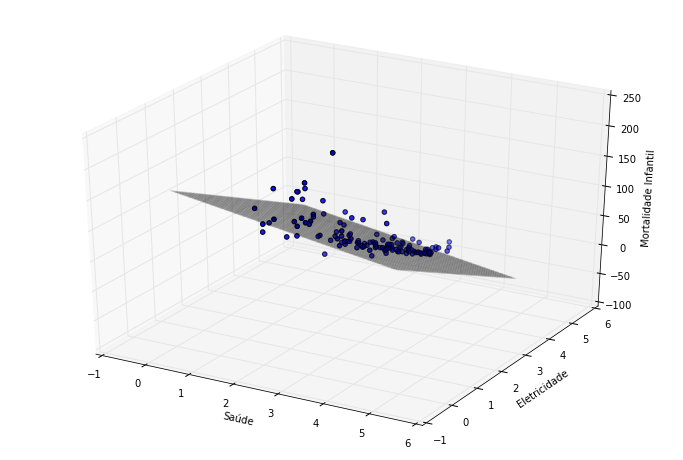

In [100]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')


model = sm.ols(formula='Mortalidade_Infantil ~ Log_Saúde + Log_Eletricidade', data = mortalidade0)
fit = model.fit()
fit.summary()


for c, m, zl, zh in [('b', 'o', 0, 192), ('b', 'o', 0, 192)]:
    xs =  mortalidade0['Log_Saúde']
    ys = mortalidade0['Log_Eletricidade']
    #zs = y_hat 
    zs = mortalidade0['Mortalidade_Infantil']
    ax.scatter(xs, ys, zs, c=c, marker=m)

    
x_surf = np.arange(0, 5, 0.1)
y_surf = np.arange(0, 5, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Log_Saúde': x_surf.ravel(), 'Log_Eletricidade': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)
    

    
ax.set_xlabel('Saúde')
ax.set_ylabel('Eletricidade')
ax.set_zlabel('Mortalidade Infantil')

plt.show()


Com os resultados obitdos é possível ver que as variáveis Log_Saúde e Log_Eletricidade nos ajuda a entender o funcionamento da variável Mortalidade Infantil. Sendo que a variavel Log_Eletricidade tem um peso maior para a Mortalidade Infantil. 
Dado essas informações é possivel dizer que se existe um aumento no consumo de eletricidade, a mortalidade infantil diminui. Dessa maneira tambem funciona com a saúde, o aumento dos gastos leva uma diminuição da mortalidade infantil, embora esta última variável tenha um impacto previsto menor.

In [51]:
pais = list(mortalidade0.País)
n_america = ["Antigua and Barbuda",
"Bahamas",
"Barbados",
"Belize",
"Canada",
"Costa Rica",
"Cuba",
"Dominica",
"Dominican Republic",
"El Salvador",
"Grenada",
"Guatemala",
"Haiti",
"Honduras",
"Jamaica",
"Mexico",
"Nicaragua",
"Panama",
"Saint Kitts and Nevis",
"Saint Lucia",
"Saint Vincent and the Grenadines",
"Trinidad and Tobago",
"United States"]

africa = ["Algeria",
"Angola",
"Benin",
"Botswana",
"Burkina",
"Burundi",
"Cameroon",
"Cape Verde",
"Central African Republic",
"Chad",
"Comoros",
"Congo",
"Democratic Republic of Congo",
"Djibouti",
"Egypt",
"Equatorial Guinea",
"Eritrea",
"Ethiopia",
"Gabon",
"Gambia",
"Ghana",
"Guinea",
"Guinea-Bissau",
"Ivory Coast",
"Kenya",
"Lesotho",
"Liberia",
"Libya",
"Madagascar",
"Malawi",
"Mali",
"Mauritania",
"Mauritius",
"Morocco",
"Mozambique",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
"Sao Tome and Principe",
"Senegal",
"Seychelles",
"Sierra Leone",
"Somalia",
"South Africa",
"South Sudan",
"Sudan",
"Swaziland",
"Tanzania",
"Togo",
"Tunisia",
"Uganda",
"Zambia",
"Zimbabwe"]

asia = ["Afghanistan",
"Bahrain",
"Bangladesh",
"Bhutan",
"Brunei",
"Burma (Myanmar)",
"Cambodia",
"China",
"East Timor",
"India",
"Indonesia",
"Iran",
"Iraq",
"Israel",
"Japan",
"Jordan",
"Kazakhstan",
"North Korea",
"South Korea",
"Kuwait",
"Kyrgyzstan",
"Laos",
"Lebanon",
"Malaysia",
"Maldives",
"Mongolia",
"Nepal",
"Oman",
"Pakistan",
"Philippines",
"Qatar",
"Russian Federation",
"Saudi Arabia",
"Singapore",
"Sri Lanka",
"Syria",
"Tajikistan",
"Thailand",
"Turkey",
"Turkmenistan",
"United Arab Emirates",
"Uzbekistan",
"Vietnam",
"Yemen"]

europe = ['Albania',
 'Andorra',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech',
 'Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'San',
 'Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican City']

oceania = ['Australia',
 'Fiji',
 'Kiribati',
 'Marshall',
 'Islands',
 'Micronesia',
 'Nauru',
 'New Zealand',
 'Palau',
 'Papua New Guinea',
 'Samoa',
 'Solomon Islands',
 'Tonga',
 'Tuvalu',
 'Vanuatu']

s_america = ['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Guyana',
 'Paraguay',
 'Peru',
 'Suriname',
 'Uruguay',
 'Venezuela']

In [89]:

mortalidade0["Continente"] = 0.0
for e in range(len(mortalidade0.País)):
    if mortalidade0.País[e] in n_america:
        mortalidade0.Continente.loc[e] = "America do Norte"
    elif mortalidade0.País[e] in s_america:
        mortalidade0.Continente.loc[e] = "America do Sul"
    elif mortalidade0.País[e] in africa:
        mortalidade0.Continente.loc[e] = "Africa"
    elif mortalidade0.País[e] in asia:
        mortalidade0.Continente.loc[e] = "Asia"
    elif mortalidade0.País[e] in oceania:
        mortalidade0.Continente.loc[e] = "Oceania"
    elif mortalidade0.País[e] in europe:
        mortalidade0.Continente.loc[e] = "Europa"

/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
mortalidade0.head()

,Eletricidade,Log_Eletricidade,Log_Saúde,Mortalidade_Infantil,País,Saude,Continente
0,1510.482138,3.179116,2.344322,17.9,Albania,1510.482138,Europa
1,920.914005,2.964219,2.376827,29.5,Algeria,920.914005,Africa
2,204.210437,2.310078,2.206638,192.0,Angola,204.210437,Africa
3,2801.082960,3.447326,2.881820,15.4,Argentina,2801.082960,America do Sul
4,1630.233270,3.212250,2.009860,20.0,Armenia,1630.233270,Europa


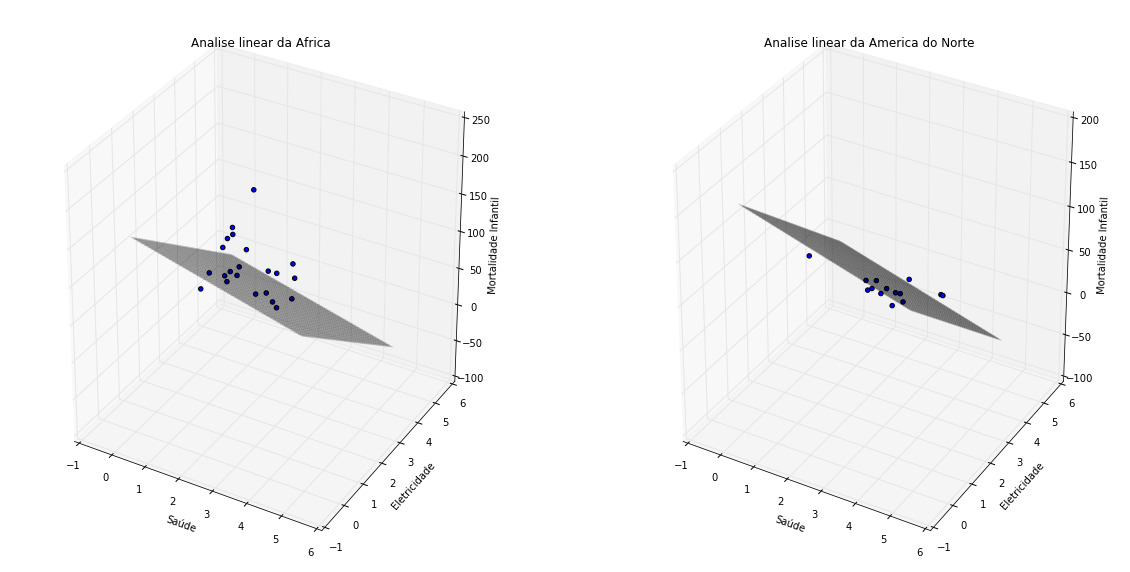

In [119]:
fig = plt.figure(figsize = (20,10))

#Figura 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
xs =  mortalidade0.Log_Saúde[mortalidade0.Continente=='Africa']
ys = mortalidade0.Log_Eletricidade[mortalidade0.Continente=='Africa']
zs = mortalidade0.Mortalidade_Infantil[mortalidade0.Continente=='Africa']

x_surf = np.arange(0, 5, 0.1)
y_surf = np.arange(0, 5, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

ax.set_title("Analise linear da Africa")
ax.set_xlabel('Saúde')
ax.set_ylabel('Eletricidade')
ax.set_zlabel('Mortalidade Infantil')
ax.scatter(xs,ys,zs,alpha=1)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

#Figura 2 
ax = fig.add_subplot(1, 2, 2, projection='3d')
xs =  mortalidade0.Log_Saúde[mortalidade0.Continente=='America do Norte']
ys = mortalidade0.Log_Eletricidade[mortalidade0.Continente=='America do Norte']
zs = mortalidade0.Mortalidade_Infantil[mortalidade0.Continente=='America do Norte']

x_surf = np.arange(0, 5, 0.1)
y_surf = np.arange(0, 5, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

ax.set_title("Analise linear da America do Norte")
ax.set_xlabel('Saúde')
ax.set_ylabel('Eletricidade')
ax.set_zlabel('Mortalidade Infantil')
ax.scatter(xs,ys,zs,alpha=1)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)



## Avaliação por Subgrupos:

Os gráficos acima relacionam as mesmas variáveis antes selecionadas, mas desta vez, com a amostra reduzida a dois continentes diferentes. Um deles é a África e o outro a America do Norte. Repare, que no gráfico do continente africano os pontos se encontram ligeiramente mais distantes do modelo se comparado aos pontos do continente Norte Americano. Isso nos mostra, que o modelo ajustado neste projeto é apropriado para análises mais globais e abrangentes, porém pode ser inadequado para analises e previsões de subgrupos específicos. Talvez seja por que o modelo leva em consideração apenas duas variáveis, enquanto na realidade milhares delas tem efeito sobre o que acontece.

## Conclusão
Voltando ao problema que nos propusemos a trabalhar neste projeto:
**A falta de eletricidade e baixo investimento do governo em saúde leva ao aumento da mortalidade infantil?**
Levando em consideração o modelo criado e os parâmetros estimados e calculados, é possível dizer que há de fato uma relação entre investimento do governo com saúde e gasto de energia por pessoa com a mortalidade infantil de um país. Porém, é importante lembrar que o gasto de energia é mais relevante para a análise do que o gasto com saúde. 
